# Metrics of the circle dataset using different optimizers

In [1]:
import numpy as np
import joblib as jb
import pickle as pk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.neural_network import MLPClassifier
from neuralNetwork.perceptron_qpso import perceptron 
from neuralNetwork.perceptron_pso import perceptron_pso
from neuralNetwork.perceptron_pso_bound import perceptron_pso_bound  

## QDPSO

### All training

In [2]:
y_qdpso_500 = np.load('qdpso_metric_113_100_1000_2_500.npy')
y_qdpso_2000 = np.load('qdpso_metric_113_100_1000_2_2000.npy')
y_qdpso_10000 = np.load('qdpso_metric_113_100_1000_2_10000.npy')

"""
x_qdpso = np.array(range(len(y_qdpso[0])))

for i in range(len(y_qdpso)):
    lab = "Training " + str(i+1)
    plt.plot(x_qdpso, y_qdpso[i], label = lab)
#plt.title("The Loss of QDPSO During Differents Training")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()
"""

y_qdpso_500_3 = np.load('qdpso_metric_113_100_1000_3_500.npy')
y_qdpso_2000_3 = np.load('qdpso_metric_113_100_1000_3_2000.npy')
y_qdpso_10000_3 = np.load('qdpso_metric_113_100_1000_3_10000.npy')

y_qdpso_500_4 = np.load('qdpso_metric_113_100_1000_4_500.npy')
y_qdpso_2000_4 = np.load('qdpso_metric_113_100_1000_4_2000.npy')
y_qdpso_10000_4 = np.load('qdpso_metric_113_100_1000_4_10000.npy')

In [3]:
qdpso_cost_500 = []
qdpso_cost_2000 = []
qdpso_cost_10000 = []

qdpso_cost_500_3 = []
qdpso_cost_2000_3 = []
qdpso_cost_10000_3 = []

qdpso_cost_500_4 = []
qdpso_cost_2000_4 = []
qdpso_cost_10000_4 = []

for i in range(len(y_qdpso_500)):
    qdpso_cost_500.append(y_qdpso_500[i][len(y_qdpso_500[0]) - 1])
    qdpso_cost_2000.append(y_qdpso_2000[i][len(y_qdpso_2000[0]) - 1])
    qdpso_cost_10000.append(y_qdpso_10000[i][len(y_qdpso_10000[0]) - 1])

    qdpso_cost_500_3.append(y_qdpso_500_3[i][len(y_qdpso_500_3[0]) - 1])
    qdpso_cost_2000_3.append(y_qdpso_2000_3[i][len(y_qdpso_2000_3[0]) - 1])
    qdpso_cost_10000_3.append(y_qdpso_10000_3[i][len(y_qdpso_10000_3[0]) - 1])

    qdpso_cost_500_4.append(y_qdpso_500_4[i][len(y_qdpso_2000_4[0]) - 1])
    qdpso_cost_2000_4.append(y_qdpso_2000_4[i][len(y_qdpso_2000_4[0]) - 1])
    qdpso_cost_10000_4.append(y_qdpso_10000_4[i][len(y_qdpso_10000_4[0]) - 1])

qdpso_cost_500 = np.array(qdpso_cost_500)
qdpso_cost_2000 = np.array(qdpso_cost_2000)
qdpso_cost_10000 = np.array(qdpso_cost_10000)

qdpso_cost_500_3 = np.array(qdpso_cost_500_3)
qdpso_cost_2000_3 = np.array(qdpso_cost_2000_3)
qdpso_cost_10000_3 = np.array(qdpso_cost_10000_3)

qdpso_cost_500_4 = np.array(qdpso_cost_500_4)
qdpso_cost_2000_4 = np.array(qdpso_cost_2000_4)
qdpso_cost_10000_4 = np.array(qdpso_cost_10000_4)

"""
mean_qdpso = np.mean(qdpso_cost)
std_qdpso = np.std(qdpso_cost)
worst_qdpso = np.max(qdpso_cost)
best_qdpso = np.min(qdpso_cost) 
print("Worst: ", worst_qdpso, " Mean: ", mean_qdpso, ' Best: ', best_qdpso, " Std: ", std_qdpso)
print("Best loss during the training in: ", (qdpso_cost.tolist()).index(best_qdpso) + 1)
"""

best_qdpso_500 = np.min(qdpso_cost_500)
best_qdpso_2000 = np.min(qdpso_cost_2000)
best_qdpso_10000 = np.min(qdpso_cost_10000)

best_qdpso_500_3 = np.min(qdpso_cost_500_3)
best_qdpso_2000_3 = np.min(qdpso_cost_2000_3)
best_qdpso_10000_3 = np.min(qdpso_cost_10000_3)

best_qdpso_500_4 = np.min(qdpso_cost_500_4)
best_qdpso_2000_4 = np.min(qdpso_cost_2000_4)
best_qdpso_10000_4 = np.min(qdpso_cost_10000_4)


### Best training

In [4]:
y_qdpso_best_500 = y_qdpso_500[(qdpso_cost_500.tolist()).index(best_qdpso_500)]
x_qdpso_best_500 = np.array(range(len(y_qdpso_best_500)))

y_qdpso_best_2000 = y_qdpso_2000[(qdpso_cost_2000.tolist()).index(best_qdpso_2000)]
x_qdpso_best_2000 = np.array(range(len(y_qdpso_best_2000)))

y_qdpso_best_10000 = y_qdpso_10000[(qdpso_cost_10000.tolist()).index(best_qdpso_10000)]
x_qdpso_best_10000 = np.array(range(len(y_qdpso_best_10000)))

y_qdpso_best_500_3 = y_qdpso_500_3[(qdpso_cost_500_3.tolist()).index(best_qdpso_500_3)]
x_qdpso_best_500_3 = np.array(range(len(y_qdpso_best_500_3)))

y_qdpso_best_2000_3 = y_qdpso_2000_3[(qdpso_cost_2000_3.tolist()).index(best_qdpso_2000_3)]
x_qdpso_best_2000_3 = np.array(range(len(y_qdpso_best_2000_3)))

y_qdpso_best_10000_3 = y_qdpso_10000_3[(qdpso_cost_10000_3.tolist()).index(best_qdpso_10000_3)]
x_qdpso_best_10000_3 = np.array(range(len(y_qdpso_best_10000_3)))

y_qdpso_best_500_4 = y_qdpso_500_4[(qdpso_cost_500_4.tolist()).index(best_qdpso_500_4)]
x_qdpso_best_500_4 = np.array(range(len(y_qdpso_best_500_4)))

y_qdpso_best_2000_4 = y_qdpso_2000_4[(qdpso_cost_2000_4.tolist()).index(best_qdpso_2000_4)]
x_qdpso_best_2000_4 = np.array(range(len(y_qdpso_best_2000_4)))

y_qdpso_best_10000_4 = y_qdpso_10000_4[(qdpso_cost_10000_4.tolist()).index(best_qdpso_10000_4)]
x_qdpso_best_10000_4 = np.array(range(len(y_qdpso_best_10000_4)))


## PSO

### All training

In [5]:

y_pso_500 = np.load('pso_metric_113_100_1000_2_500.npy')
y_pso_2000 = np.load('pso_metric_113_100_1000_2_2000.npy')
y_pso_10000 = np.load('pso_metric_113_100_1000_2_10000.npy')

""""

x_pso = np.array(range(len(y_pso[0])))

for i in range(len(y_pso)):
    lab = "Training " + str(i+1)
    plt.plot(x_pso, y_pso[i], label = lab)

#plt.title("The Loss of PSO During Differents Training")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()
"""

y_pso_500_3 = np.load('pso_metric_113_100_1000_3_500.npy')
y_pso_2000_3 = np.load('pso_metric_113_100_1000_3_2000.npy')
y_pso_10000_3 = np.load('pso_metric_113_100_1000_3_10000.npy')

y_pso_500_4 = np.load('pso_metric_113_100_1000_4_500.npy')
y_pso_2000_4 = np.load('pso_metric_113_100_1000_4_2000.npy')
y_pso_10000_4 = np.load('pso_metric_113_100_1000_4_10000.npy')

In [6]:
pso_cost_500 = []
pso_cost_2000 = []
pso_cost_10000 = []

pso_cost_500_3 = []
pso_cost_2000_3 = []
pso_cost_10000_3 = []

pso_cost_500_4 = []
pso_cost_2000_4 = []
pso_cost_10000_4 = []

for i in range(len(y_pso_500)):
    pso_cost_500.append(y_pso_500[i][len(y_pso_500[0]) - 1])
    pso_cost_2000.append(y_pso_2000[i][len(y_pso_2000[0]) - 1])
    pso_cost_10000.append(y_pso_10000[i][len(y_pso_10000[0]) - 1])

    pso_cost_500_3.append(y_pso_500_3[i][len(y_pso_500_3[0]) - 1])
    pso_cost_2000_3.append(y_pso_2000_3[i][len(y_pso_2000_3[0]) - 1])
    pso_cost_10000_3.append(y_pso_10000_3[i][len(y_pso_10000_3[0]) - 1])

    pso_cost_500_4.append(y_pso_500_4[i][len(y_pso_500_4[0]) - 1])
    pso_cost_2000_4.append(y_pso_2000_4[i][len(y_pso_2000_4[0]) - 1])
    pso_cost_10000_4.append(y_pso_10000_4[i][len(y_pso_10000_4[0]) - 1])

#print(y_qdpso[0])
#print(qdpso_cost)

pso_cost_500 = np.array(pso_cost_500)
pso_cost_2000 = np.array(pso_cost_2000)
pso_cost_10000 = np.array(pso_cost_10000)

pso_cost_500_3 = np.array(pso_cost_500_3)
pso_cost_2000_3 = np.array(pso_cost_2000_3)
pso_cost_10000_3 = np.array(pso_cost_10000_3)

pso_cost_500_4 = np.array(pso_cost_500_4)
pso_cost_2000_4 = np.array(pso_cost_2000_4)
pso_cost_10000_4 = np.array(pso_cost_10000_4)

"""
pso_cost = np.array(pso_cost)
mean_pso = np.mean(pso_cost)
std_pso = np.std(pso_cost)
worst_pso = np.max(pso_cost)
best_pso = np.min(pso_cost) 
print("Worst: ", worst_pso, " Mean: ", mean_pso, " Best: ", best_pso,"Std: ", std_pso)
print("Best loss during the training in: ", (pso_cost.tolist()).index(best_pso) + 1)
"""

best_pso_500 = np.min(pso_cost_500)
best_pso_2000 = np.min(pso_cost_2000)
best_pso_10000 = np.min(pso_cost_10000)

best_pso_500_3 = np.min(pso_cost_500_3)
best_pso_2000_3 = np.min(pso_cost_2000_3)
best_pso_10000_3 = np.min(pso_cost_10000_3)

best_pso_500_4 = np.min(pso_cost_500_4)
best_pso_2000_4 = np.min(pso_cost_2000_4)
best_pso_10000_4 = np.min(pso_cost_10000_4)

### Best training

In [7]:
y_pso_best_500 = y_pso_500[(pso_cost_500.tolist()).index(best_pso_500)]
x_pso_best_500 = np.array(range(len(y_pso_best_500)))

y_pso_best_2000 = y_pso_2000[(pso_cost_2000.tolist()).index(best_pso_2000)]
x_pso_best_2000 = np.array(range(len(y_pso_best_2000)))

y_pso_best_10000 = y_pso_10000[(pso_cost_10000.tolist()).index(best_pso_10000)]
x_pso_best_10000 = np.array(range(len(y_pso_best_10000)))

y_pso_best_500_3 = y_pso_500_3[(pso_cost_500_3.tolist()).index(best_pso_500_3)]
x_pso_best_500_3 = np.array(range(len(y_pso_best_500_3)))

y_pso_best_2000_3 = y_pso_2000_3[(pso_cost_2000_3.tolist()).index(best_pso_2000_3)]
x_pso_best_2000_3 = np.array(range(len(y_pso_best_2000_3)))

y_pso_best_10000_3 = y_pso_10000_3[(pso_cost_10000_3.tolist()).index(best_pso_10000_3)]
x_pso_best_10000_3 = np.array(range(len(y_pso_best_10000_3)))

y_pso_best_500_4 = y_pso_500_4[(pso_cost_500_4.tolist()).index(best_pso_500_4)]
x_pso_best_500_4 = np.array(range(len(y_pso_best_500_4)))

y_pso_best_2000_4 = y_pso_2000_4[(pso_cost_2000_4.tolist()).index(best_pso_2000_4)]
x_pso_best_2000_4 = np.array(range(len(y_pso_best_2000_4)))

y_pso_best_10000_4 = y_pso_10000_4[(pso_cost_10000_4.tolist()).index(best_pso_10000_4)]
x_pso_best_10000_4 = np.array(range(len(y_pso_best_10000_4)))

## PSO_Bound

In [8]:
y_pso_bound_500 = np.load('pso_bound_metric_113_100_1000_2_500.npy')
y_pso_bound_2000 = np.load('pso_bound_metric_113_100_1000_2_2000.npy')
y_pso_bound_10000 = np.load('pso_bound_metric_113_100_1000_2_10000.npy')

"""
x_pso_bound = np.array(range(len(y_pso_bound[0])))

for i in range(len(y_pso_bound)):
    lab = "Training " + str(i+1)
    plt.plot(x_pso_bound, y_pso_bound[i], label = lab)

#plt.title("The Loss of PSO_bound During Differents Training")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()
"""

y_pso_bound_500_3 = np.load('pso_bound_metric_113_100_1000_3_500.npy')
y_pso_bound_2000_3 = np.load('pso_bound_metric_113_100_1000_3_2000.npy')
y_pso_bound_10000_3 = np.load('pso_bound_metric_113_100_1000_3_10000.npy')

y_pso_bound_500_4 = np.load('pso_bound_metric_113_100_1000_4_500.npy')
y_pso_bound_2000_4 = np.load('pso_bound_metric_113_100_1000_4_2000.npy')
y_pso_bound_10000_4 = np.load('pso_bound_metric_113_100_1000_4_10000.npy')

In [9]:
pso_bound_cost_500 = []
pso_bound_cost_2000 = []
pso_bound_cost_10000 = []

pso_bound_cost_500_3 = []
pso_bound_cost_2000_3 = []
pso_bound_cost_10000_3 = []

pso_bound_cost_500_4 = []
pso_bound_cost_2000_4 = []
pso_bound_cost_10000_4 = []

for i in range(len(y_pso_bound_500)):
    pso_bound_cost_500.append(y_pso_bound_500[i][len(y_pso_bound_500[0]) - 1])
    pso_bound_cost_2000.append(y_pso_bound_2000[i][len(y_pso_bound_2000[0]) - 1])
    pso_bound_cost_10000.append(y_pso_bound_10000[i][len(y_pso_bound_10000[0]) - 1])

    pso_bound_cost_500_3.append(y_pso_bound_500_3[i][len(y_pso_bound_500_3[0]) - 1])
    pso_bound_cost_2000_3.append(y_pso_bound_2000_3[i][len(y_pso_bound_2000_3[0]) - 1])
    pso_bound_cost_10000_3.append(y_pso_bound_10000_3[i][len(y_pso_bound_10000_3[0]) - 1])

    pso_bound_cost_500_4.append(y_pso_bound_500_4[i][len(y_pso_bound_500_4[0]) - 1])
    pso_bound_cost_2000_4.append(y_pso_bound_2000_4[i][len(y_pso_bound_2000_4[0]) - 1])
    pso_bound_cost_10000_4.append(y_pso_bound_10000_4[i][len(y_pso_bound_10000_4[0]) - 1])

pso_bound_cost_500 = np.array(pso_bound_cost_500)
pso_bound_cost_2000 = np.array(pso_bound_cost_2000)
pso_bound_cost_10000 = np.array(pso_bound_cost_10000)

pso_bound_cost_500_3 = np.array(pso_bound_cost_500_3)
pso_bound_cost_2000_3 = np.array(pso_bound_cost_2000_3)
pso_bound_cost_10000_3 = np.array(pso_bound_cost_10000_3)

pso_bound_cost_500_4 = np.array(pso_bound_cost_500_4)
pso_bound_cost_2000_4 = np.array(pso_bound_cost_2000_4)
pso_bound_cost_10000_4 = np.array(pso_bound_cost_10000_4)

"""
mean_pso_bound = np.mean(pso_bound_cost)
std_pso_bound = np.std(pso_bound_cost)
worst_pso_bound = np.max(pso_bound_cost) 
best_pso_bound = np.min(pso_bound_cost)
print("Worst: ", worst_pso_bound, " Mean: ", mean_pso_bound," Best: ", best_pso_bound, " Std: ", std_pso_bound)
print("Best loss during the training in: ", (pso_bound_cost.tolist()).index(best_pso_bound) + 1)
"""

best_pso_bound_500 = np.min(pso_bound_cost_500)
best_pso_bound_2000 = np.min(pso_bound_cost_2000)
best_pso_bound_10000 = np.min(pso_bound_cost_10000)

best_pso_bound_500_3 = np.min(pso_bound_cost_500_3)
best_pso_bound_2000_3 = np.min(pso_bound_cost_2000_3)
best_pso_bound_10000_3 = np.min(pso_bound_cost_10000_3)

best_pso_bound_500_4 = np.min(pso_bound_cost_500_4)
best_pso_bound_2000_4 = np.min(pso_bound_cost_2000_4)
best_pso_bound_10000_4 = np.min(pso_bound_cost_10000_4)

### Best training

In [10]:
y_pso_bound_best_500 = y_pso_bound_500[(pso_bound_cost_500.tolist()).index(best_pso_bound_500)]
x_pso_bound_best_500 = np.array(range(len(y_pso_bound_best_500)))

y_pso_bound_best_2000 = y_pso_bound_2000[(pso_bound_cost_2000.tolist()).index(best_pso_bound_2000)]
x_pso_bound_best_2000 = np.array(range(len(y_pso_bound_best_2000)))

y_pso_bound_best_10000 = y_pso_bound_10000[(pso_bound_cost_10000.tolist()).index(best_pso_bound_10000)]
x_pso_bound_best_10000 = np.array(range(len(y_pso_bound_best_10000)))

y_pso_bound_best_500_3 = y_pso_bound_500_3[(pso_bound_cost_500_3.tolist()).index(best_pso_bound_500_3)]
x_pso_bound_best_500_3 = np.array(range(len(y_pso_bound_best_500_3)))

y_pso_bound_best_2000_3 = y_pso_bound_2000_3[(pso_bound_cost_2000_3.tolist()).index(best_pso_bound_2000_3)]
x_pso_bound_best_2000_3 = np.array(range(len(y_pso_bound_best_2000_3)))

y_pso_bound_best_10000_3 = y_pso_bound_10000_3[(pso_bound_cost_10000_3.tolist()).index(best_pso_bound_10000_3)]
x_pso_bound_best_10000_3 = np.array(range(len(y_pso_bound_best_10000_3)))

y_pso_bound_best_500_4 = y_pso_bound_500_4[(pso_bound_cost_500_4.tolist()).index(best_pso_bound_500_4)]
x_pso_bound_best_500_4 = np.array(range(len(y_pso_bound_best_500_4)))

y_pso_bound_best_2000_4 = y_pso_bound_2000_4[(pso_bound_cost_2000_4.tolist()).index(best_pso_bound_2000_4)]
x_pso_bound_best_2000_4 = np.array(range(len(y_pso_bound_best_2000_4)))

y_pso_bound_best_10000_4 = y_pso_bound_10000_4[(pso_bound_cost_10000_4.tolist()).index(best_pso_bound_10000_4)]
x_pso_bound_best_10000_4 = np.array(range(len(y_pso_bound_best_10000_4)))

## The best loss of the Metaheuristic-based optimizers

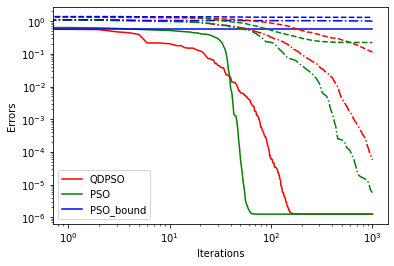

In [11]:
plt.plot(x_qdpso_best_500, y_qdpso_best_500, 'r', label = 'QDPSO')
plt.plot(x_pso_best_500, y_pso_best_500, 'g', label = 'PSO')
plt.plot(x_pso_bound_best_500, y_pso_bound_best_500, 'b', label = 'PSO_bound')

plt.plot(x_qdpso_best_500_3, y_qdpso_best_500_3, 'r-.')
plt.plot(x_pso_best_500_3, y_pso_best_500_3, 'g-.')
plt.plot(x_pso_bound_best_500_3, y_pso_bound_best_500_3, 'b-.')

plt.plot(x_qdpso_best_500_4, y_qdpso_best_500_4, 'r--')
plt.plot(x_pso_best_500_4, y_pso_best_500_4, 'g--')
plt.plot(x_pso_bound_best_500_4, y_pso_bound_best_500_4, 'b--')

"""
plt.plot(x_qdpso_best_2000, y_qdpso_best_2000, 'r-.', label = 'QDPSO')
plt.plot(x_pso_best_2000, y_pso_best_2000, 'g-.', label = 'PSO')
plt.plot(x_pso_bound_best_2000, y_pso_bound_best_2000, 'b-.', label = 'PSO_bound')

plt.plot(x_qdpso_best_10000, y_qdpso_best_10000, 'r--', label = 'QDPSO')
plt.plot(x_pso_best_10000, y_pso_best_10000, 'g--', label = 'PSO')
plt.plot(x_pso_bound_best_10000, y_pso_bound_best_10000, 'b--', label = 'PSO_bound')
"""

#plt.title("The Best Loss of the Metaheuristic-based Optimizers")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

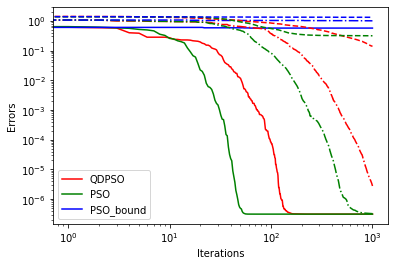

In [12]:
plt.plot(x_qdpso_best_2000, y_qdpso_best_2000, 'r', label = 'QDPSO')
plt.plot(x_pso_best_2000, y_pso_best_2000, 'g', label = 'PSO')
plt.plot(x_pso_bound_best_2000, y_pso_bound_best_2000, 'b', label = 'PSO_bound')

plt.plot(x_qdpso_best_2000_3, y_qdpso_best_2000_3, 'r-.')
plt.plot(x_pso_best_2000_3, y_pso_best_2000_3, 'g-.')
plt.plot(x_pso_bound_best_2000_3, y_pso_bound_best_2000_3, 'b-.')

plt.plot(x_qdpso_best_2000_4, y_qdpso_best_2000_4, 'r--')
plt.plot(x_pso_best_2000_4, y_pso_best_2000_4, 'g--')
plt.plot(x_pso_bound_best_2000_4, y_pso_bound_best_2000_4, 'b--')

"""
plt.plot(x_qdpso_best_2000, y_qdpso_best_2000, 'r-.', label = 'QDPSO')
plt.plot(x_pso_best_2000, y_pso_best_2000, 'g-.', label = 'PSO')
plt.plot(x_pso_bound_best_2000, y_pso_bound_best_2000, 'b-.', label = 'PSO_bound')

plt.plot(x_qdpso_best_10000, y_qdpso_best_10000, 'r--', label = 'QDPSO')
plt.plot(x_pso_best_10000, y_pso_best_10000, 'g--', label = 'PSO')
plt.plot(x_pso_bound_best_10000, y_pso_bound_best_10000, 'b--', label = 'PSO_bound')
"""

#plt.title("The Best Loss of the Metaheuristic-based Optimizers")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

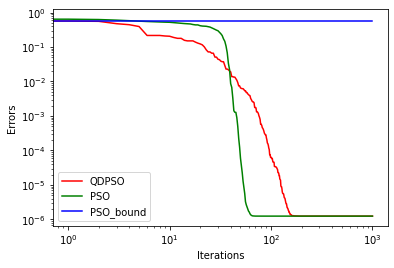

In [13]:
plt.plot(x_qdpso_best_500, y_qdpso_best_500, 'r', label = 'QDPSO')
plt.plot(x_pso_best_500, y_pso_best_500, 'g', label = 'PSO')
plt.plot(x_pso_bound_best_500, y_pso_bound_best_500, 'b', label = 'PSO_bound')

#plt.title("The Best Loss of the Metaheuristic-based Optimizers")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

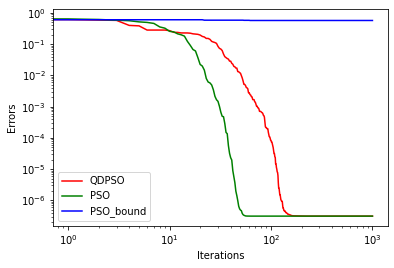

In [14]:
plt.plot(x_qdpso_best_2000, y_qdpso_best_2000, 'r', label = 'QDPSO')
plt.plot(x_pso_best_2000, y_pso_best_2000, 'g', label = 'PSO')
plt.plot(x_pso_bound_best_2000, y_pso_bound_best_2000, 'b', label = 'PSO_bound')

#plt.title("The Best Loss of the Metaheuristic-based Optimizers")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

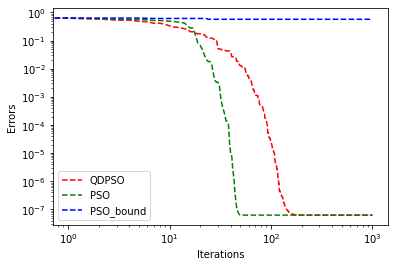

In [15]:
plt.plot(x_qdpso_best_10000, y_qdpso_best_10000, 'r--', label = 'QDPSO')
plt.plot(x_pso_best_10000, y_pso_best_10000, 'g--', label = 'PSO')
plt.plot(x_pso_bound_best_10000, y_pso_bound_best_10000, 'b--', label = 'PSO_bound')

#plt.title("The Best Loss of the Metaheuristic-based Optimizers")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

## Adam

### All training

In [16]:
with open ('adam_circle_metric_113_100_1000_2_500', 'rb') as temp:
    y_adam_500 = pk.load(temp)
with open ('adam_circle_metric_113_100_1000_2_2000', 'rb') as temp:
    y_adam_2000 = pk.load(temp)
with open ('adam_circle_metric_113_100_1000_2_10000', 'rb') as temp:
    y_adam_10000 = pk.load(temp)

""""
x_adam = np.array(range(len(y_adam[0])))

for i in range (len(y_adam)):
    lab = "Training " + str(i+1)
    plt.plot(x_adam, y_adam[i], label = lab)

#plt.title("The Loss of Adam During Differents Training")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()
"""

with open ('adam_circle_metric_113_100_1000_3_500', 'rb') as temp:
    y_adam_500_3 = pk.load(temp)
with open ('adam_circle_metric_113_100_1000_3_2000', 'rb') as temp:
    y_adam_2000_3 = pk.load(temp)
with open ('adam_circle_metric_113_100_1000_3_10000', 'rb') as temp:
    y_adam_10000_3 = pk.load(temp)

with open ('adam_circle_metric_113_100_1000_4_500', 'rb') as temp:
    y_adam_500_4 = pk.load(temp)
with open ('adam_circle_metric_113_100_1000_4_2000', 'rb') as temp:
    y_adam_2000_4 = pk.load(temp)
with open ('adam_circle_metric_113_100_1000_4_10000', 'rb') as temp:
    y_adam_10000_4 = pk.load(temp)

In [17]:
adam_cost_500 = []
adam_cost_2000 = []
adam_cost_10000 = []

adam_cost_500_3 = []
adam_cost_2000_3 = []
adam_cost_10000_3 = []

adam_cost_500_4 = []
adam_cost_2000_4 = []
adam_cost_10000_4 = []

for i in range(len(y_adam_500)):
    adam_cost_500.append(y_adam_500[i][len(y_adam_500[0]) - 1])
    adam_cost_2000.append(y_adam_2000[i][len(y_adam_2000[0]) - 1])
    adam_cost_10000.append(y_adam_10000[i][len(y_adam_10000[0]) - 1])

    adam_cost_500_3.append(y_adam_500_3[i][len(y_adam_500_3[0]) - 1])
    adam_cost_2000_3.append(y_adam_2000_3[i][len(y_adam_2000_3[0]) - 1])
    adam_cost_10000_3.append(y_adam_10000_3[i][len(y_adam_10000_3[0]) - 1])

    adam_cost_500_4.append(y_adam_500_4[i][len(y_adam_500_4[0]) - 1])
    adam_cost_2000_4.append(y_adam_2000_4[i][len(y_adam_2000_4[0]) - 1])
    adam_cost_10000_4.append(y_adam_10000_4[i][len(y_adam_10000_4[0]) - 1])

adam_cost_500 = np.array(adam_cost_500)
adam_cost_2000 = np.array(adam_cost_2000)
adam_cost_10000 = np.array(adam_cost_10000)

adam_cost_500_3 = np.array(adam_cost_500_3)
adam_cost_2000_3 = np.array(adam_cost_2000_3)
adam_cost_10000_3 = np.array(adam_cost_10000_3)

adam_cost_500_4 = np.array(adam_cost_500_4)
adam_cost_2000_4 = np.array(adam_cost_2000_4)
adam_cost_10000_4 = np.array(adam_cost_10000_4)

"""
adam_cost = np.array(adam_cost)
mean_adam = np.mean(adam_cost)
std_adam = np.std(adam_cost)
worst_adam = np.max(adam_cost) 
best_adam = np.min(adam_cost)
print("Worst: ", worst_adam, " Mean: ", mean_adam, " Best: ", best_adam, " Std: ", std_adam)
print("Best loss during the training in: ", (adam_cost.tolist()).index(best_adam) + 1)
"""

best_adam_500 = np.min(adam_cost_500)
best_adam_2000 = np.min(adam_cost_2000)
best_adam_10000 = np.min(adam_cost_10000)

best_adam_500_3 = np.min(adam_cost_500_3)
best_adam_2000_3 = np.min(adam_cost_2000_3)
best_adam_10000_3 = np.min(adam_cost_10000_3)

best_adam_500_4 = np.min(adam_cost_500_4)
best_adam_2000_4 = np.min(adam_cost_2000_4)
best_adam_10000_4 = np.min(adam_cost_10000_4)


### Best training

In [18]:
adam_loss_load_500 = y_adam_500[(adam_cost_500.tolist()).index(best_adam_500)]
adam_loss_load_2000 = y_adam_2000[(adam_cost_2000.tolist()).index(best_adam_2000)]
adam_loss_load_10000 = y_adam_10000[(adam_cost_10000.tolist()).index(best_adam_10000)]

adam_loss_load_500_3 = y_adam_500_3[(adam_cost_500_3.tolist()).index(best_adam_500_3)]
adam_loss_load_2000_3 = y_adam_2000_3[(adam_cost_2000_3.tolist()).index(best_adam_2000_3)]
adam_loss_load_10000_3 = y_adam_10000_3[(adam_cost_10000_3.tolist()).index(best_adam_10000_3)]

adam_loss_load_500_4 = y_adam_500_4[(adam_cost_500_4.tolist()).index(best_adam_500_4)]
adam_loss_load_2000_4 = y_adam_2000_4[(adam_cost_2000_4.tolist()).index(best_adam_2000_4)]
adam_loss_load_10000_4 = y_adam_10000_4[(adam_cost_10000_4.tolist()).index(best_adam_10000_4)]

## SGD

In [19]:
with open ('sgd_circle_metric_113_100_1000_2_500', 'rb') as temp:
    y_sgd_500 = pk.load(temp)
with open ('sgd_circle_metric_113_100_1000_2_2000', 'rb') as temp:
    y_sgd_2000 = pk.load(temp)
with open ('sgd_circle_metric_113_100_1000_2_10000', 'rb') as temp:
    y_sgd_10000 = pk.load(temp)

"""
x_sgd = np.array(range(len(y_sgd[0])))

for i in range (len(y_sgd)):
    lab = "Training " + str(i+1)
    plt.plot(x_sgd, y_sgd[i], label = lab)

#plt.title("The Loss of SGD During Differents Training")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()
"""

with open ('sgd_circle_metric_113_100_1000_3_500', 'rb') as temp:
    y_sgd_500_3 = pk.load(temp)
with open ('sgd_circle_metric_113_100_1000_3_2000', 'rb') as temp:
    y_sgd_2000_3 = pk.load(temp)
with open ('sgd_circle_metric_113_100_1000_3_10000', 'rb') as temp:
    y_sgd_10000_3 = pk.load(temp)

with open ('sgd_circle_metric_113_100_1000_4_500', 'rb') as temp:
    y_sgd_500_4 = pk.load(temp)
with open ('sgd_circle_metric_113_100_1000_4_2000', 'rb') as temp:
    y_sgd_2000_4 = pk.load(temp)
with open ('sgd_circle_metric_113_100_1000_4_10000', 'rb') as temp:
    y_sgd_10000_4 = pk.load(temp)

In [20]:
sgd_cost_500 = []
sgd_cost_2000 = []
sgd_cost_10000 = []

sgd_cost_500_3 = []
sgd_cost_2000_3 = []
sgd_cost_10000_3 = []

sgd_cost_500_4 = []
sgd_cost_2000_4 = []
sgd_cost_10000_4 = []

for i in range(len(y_sgd_500)):
    sgd_cost_500.append(y_sgd_500[i][len(y_sgd_500[0]) - 1])
    sgd_cost_2000.append(y_sgd_2000[i][len(y_sgd_2000[0]) - 1])
    sgd_cost_10000.append(y_sgd_10000[i][len(y_sgd_10000[0]) - 1])

    sgd_cost_500_3.append(y_sgd_500_3[i][len(y_sgd_500_3[0]) - 1])
    sgd_cost_2000_3.append(y_sgd_2000_3[i][len(y_sgd_2000_3[0]) - 1])
    sgd_cost_10000_3.append(y_sgd_10000_3[i][len(y_sgd_10000_3[0]) - 1])

    sgd_cost_500_4.append(y_sgd_500_4[i][len(y_sgd_500_4[0]) - 1])
    sgd_cost_2000_4.append(y_sgd_2000_4[i][len(y_sgd_2000_4[0]) - 1])
    sgd_cost_10000_4.append(y_sgd_10000_4[i][len(y_sgd_10000_4[0]) - 1])

sgd_cost_500 = np.array(sgd_cost_500)
sgd_cost_2000 = np.array(sgd_cost_2000)
sgd_cost_10000 = np.array(sgd_cost_10000)

sgd_cost_500_3 = np.array(sgd_cost_500_3)
sgd_cost_2000_3 = np.array(sgd_cost_2000_3)
sgd_cost_10000_3 = np.array(sgd_cost_10000_3)

sgd_cost_500_4 = np.array(sgd_cost_500_4)
sgd_cost_2000_4 = np.array(sgd_cost_2000_4)
sgd_cost_10000_4 = np.array(sgd_cost_10000_4)

"""
sgd_cost = np.array(sgd_cost)
mean_sgd = np.mean(sgd_cost)
std_sgd = np.std(sgd_cost)
worst_sgd = np.max(sgd_cost) 
best_sgd = np.min(sgd_cost)
print(" Worst: ", worst_sgd, " Mean: ", mean_sgd, " Best: ", best_sgd, " Std: ", std_sgd)
print("Best loss during the training in: ", (sgd_cost.tolist()).index(best_sgd) + 1)
"""

best_sgd_500 = np.min(sgd_cost_500)
best_sgd_2000 = np.min(sgd_cost_2000)
best_sgd_10000 = np.min(sgd_cost_10000)

best_sgd_500_3 = np.min(sgd_cost_500_3)
best_sgd_2000_3 = np.min(sgd_cost_2000_3)
best_sgd_10000_3 = np.min(sgd_cost_10000_3)

best_sgd_500_4 = np.min(sgd_cost_500_4)
best_sgd_2000_4 = np.min(sgd_cost_2000_4)
best_sgd_10000_4 = np.min(sgd_cost_10000_4)

### Best Training

In [21]:
sgd_loss_load_500 = y_sgd_500[(sgd_cost_500.tolist()).index(best_sgd_500)]
sgd_loss_load_2000 = y_sgd_2000[(sgd_cost_2000.tolist()).index(best_sgd_2000)]
sgd_loss_load_10000 = y_sgd_10000[(sgd_cost_10000.tolist()).index(best_sgd_10000)]

sgd_loss_load_500_3 = y_sgd_500_3[(sgd_cost_500_3.tolist()).index(best_sgd_500_3)]
sgd_loss_load_2000_3 = y_sgd_2000_3[(sgd_cost_2000_3.tolist()).index(best_sgd_2000_3)]
sgd_loss_load_10000_3 = y_sgd_10000_3[(sgd_cost_10000_3.tolist()).index(best_sgd_10000_3)]

sgd_loss_load_500_4 = y_sgd_500_4[(sgd_cost_500_4.tolist()).index(best_sgd_500_4)]
sgd_loss_load_2000_4 = y_sgd_2000_4[(sgd_cost_2000_4.tolist()).index(best_sgd_2000_4)]
sgd_loss_load_10000_4 = y_sgd_10000_4[(sgd_cost_10000_4.tolist()).index(best_sgd_10000_4)]

# All metrics

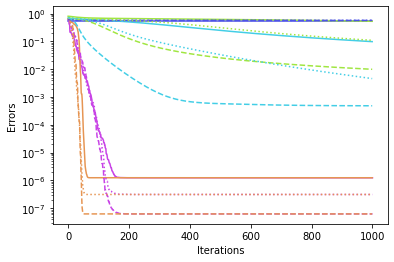

In [24]:
plt.plot(x_qdpso_best_500, y_qdpso_best_500, color='#C843E6', linestyle = '-', label='QDPSO')
plt.plot(x_pso_best_500, y_pso_best_500, color='#E69553', linestyle = '-', label='PSO')
plt.plot(x_pso_bound_best_500, y_pso_bound_best_500, color='#4E53E6', linestyle = '-', label='PSO-bound')
plt.plot(sgd_loss_load_500, color='#A0E641', linestyle = '-', label='SDG')
plt.plot(adam_loss_load_500, color='#43CEE6', linestyle = '-', label='Adam')

plt.plot(x_qdpso_best_10000, y_qdpso_best_10000, '#C843E6', linestyle = '--')
plt.plot(x_pso_best_10000, y_pso_best_10000, '#E69553', linestyle = '--')
plt.plot(x_pso_bound_best_10000, y_pso_bound_best_10000, '#4E53E6', linestyle = '--')
plt.plot(sgd_loss_load_10000, '#A0E641', linestyle = '--')
plt.plot(adam_loss_load_10000, '#43CEE6', linestyle = '--',)

plt.plot(x_qdpso_best_2000, y_qdpso_best_2000, '#C843E6', linestyle = 'dotted')
plt.plot(x_pso_best_2000, y_pso_best_2000, '#E69553', linestyle = 'dotted')
plt.plot(x_pso_bound_best_2000, y_pso_bound_best_2000, '#4E53E6', linestyle = 'dotted')
plt.plot(sgd_loss_load_2000, '#A0E641', linestyle = 'dotted')
plt.plot(adam_loss_load_2000, '#43CEE6', linestyle = 'dotted')

#plt.title("The Best Loss of the Metaheuristic-based Optimizers")
plt.ylabel("Errors")
plt.xlabel("Iterations")
#plt.legend(loc=7)
plt.yscale('log')
#plt.xscale('log')
plt.show()

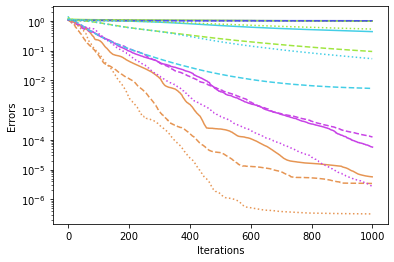

In [25]:
plt.plot(x_qdpso_best_500_3, y_qdpso_best_500_3, color='#C843E6', linestyle = '-', label='QDPSO')
plt.plot(x_pso_best_500_3, y_pso_best_500_3, color='#E69553', linestyle = '-', label='PSO')
plt.plot(x_pso_bound_best_500_3, y_pso_bound_best_500_3, color='#4E53E6', linestyle = '-', label='PSO-bound')
plt.plot(sgd_loss_load_500_3, color='#A0E641', linestyle = '-', label='SDG')
plt.plot(adam_loss_load_500_3, color='#43CEE6', linestyle = '-', label='Adam')

plt.plot(x_qdpso_best_10000_3, y_qdpso_best_10000_3, '#C843E6', linestyle = '--')
plt.plot(x_pso_best_10000_3, y_pso_best_10000_3, '#E69553', linestyle = '--')
plt.plot(x_pso_bound_best_10000_3, y_pso_bound_best_10000_3, '#4E53E6', linestyle = '--')
plt.plot(sgd_loss_load_10000_3, '#A0E641', linestyle = '--')
plt.plot(adam_loss_load_10000_3, '#43CEE6', linestyle = '--',)

plt.plot(x_qdpso_best_2000_3, y_qdpso_best_2000_3, '#C843E6', linestyle = 'dotted')
plt.plot(x_pso_best_2000_3, y_pso_best_2000_3, '#E69553', linestyle = 'dotted')
plt.plot(x_pso_bound_best_2000_3, y_pso_bound_best_2000_3, '#4E53E6', linestyle = 'dotted')
plt.plot(sgd_loss_load_2000_3, '#A0E641', linestyle = 'dotted')
plt.plot(adam_loss_load_2000_3, '#43CEE6', linestyle = 'dotted')

#plt.title("The Best Loss of the Metaheuristic-based Optimizers")
plt.ylabel("Errors")
plt.xlabel("Iterations")
#plt.legend()
plt.yscale('log')
#plt.xscale('log')
plt.show()

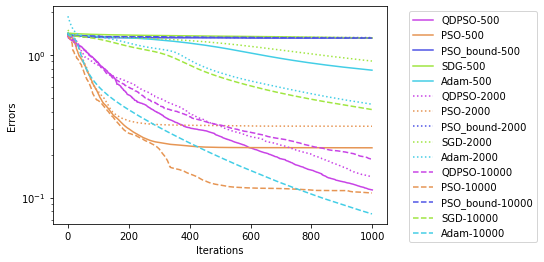

In [26]:
plt.plot(x_qdpso_best_500_4, y_qdpso_best_500_4, color='#C843E6', linestyle = '-', label='QDPSO-500')
plt.plot(x_pso_best_500_4, y_pso_best_500_4, color='#E69553', linestyle = '-', label='PSO-500')
plt.plot(x_pso_bound_best_500_4, y_pso_bound_best_500_4, color='#4E53E6', linestyle = '-', label='PSO_bound-500')
plt.plot(sgd_loss_load_500_4, color='#A0E641', linestyle = '-', label='SDG-500')
plt.plot(adam_loss_load_500_4, color='#43CEE6', linestyle = '-', label='Adam-500')

plt.plot(x_qdpso_best_2000_4, y_qdpso_best_2000_4, '#C843E6', linestyle = 'dotted', label='QDPSO-2000')
plt.plot(x_pso_best_2000_4, y_pso_best_2000_4, '#E69553', linestyle = 'dotted', label='PSO-2000')
plt.plot(x_pso_bound_best_2000_4, y_pso_bound_best_2000_4, '#4E53E6', linestyle = 'dotted', label='PSO_bound-2000')
plt.plot(sgd_loss_load_2000_4, '#A0E641', linestyle = 'dotted', label='SGD-2000')
plt.plot(adam_loss_load_2000_4, '#43CEE6', linestyle = 'dotted', label='Adam-2000')

plt.plot(x_qdpso_best_10000_4, y_qdpso_best_10000_4, '#C843E6', linestyle = '--', label='QDPSO-10000')
plt.plot(x_pso_best_10000_4, y_pso_best_10000_4, '#E69553', linestyle = '--', label='PSO-10000')
plt.plot(x_pso_bound_best_10000_4, y_pso_bound_best_10000_4, '#4E53E6', linestyle = '--', label='PSO_bound-10000')
plt.plot(sgd_loss_load_10000_4, '#A0E641', linestyle = '--', label='SGD-10000')
plt.plot(adam_loss_load_10000_4, '#43CEE6', linestyle = '--', label='Adam-10000')

#plt.title("The Best Loss of the Metaheuristic-based Optimizers")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.yscale('log')
#plt.xscale('log')
plt.show()

# New Combination

## 2 classes

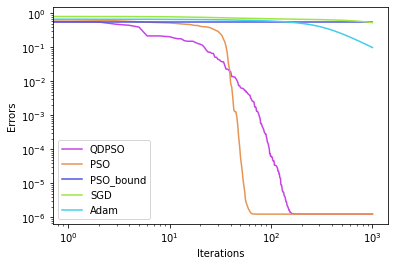

In [69]:
plt.plot(x_qdpso_best_500, y_qdpso_best_500, color='#C843E6', linestyle = '-', label='QDPSO')
plt.plot(x_pso_best_500, y_pso_best_500, color='#E69553', linestyle = '-', label='PSO')
plt.plot(x_pso_bound_best_500, y_pso_bound_best_500, color='#4E53E6', linestyle = '-', label='PSO_bound')
plt.plot(sgd_loss_load_500, color='#A0E641', linestyle = '-', label='SGD')
plt.plot(adam_loss_load_500, color='#43CEE6', linestyle = '-', label='Adam')

#plt.title("The Best Loss of the Metaheuristic-based Optimizers")
plt.ylabel("Errors")
plt.xlabel("Iterations")
#plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

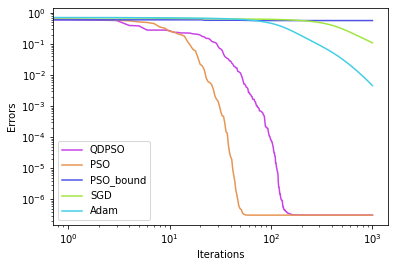

In [70]:
plt.plot(x_qdpso_best_2000, y_qdpso_best_2000, '#C843E6', linestyle = '-', label='QDPSO')
plt.plot(x_pso_best_2000, y_pso_best_2000, '#E69553', linestyle = '-', label='PSO')
plt.plot(x_pso_bound_best_2000, y_pso_bound_best_2000, '#4E53E6', linestyle = '-', label='PSO_bound')
plt.plot(sgd_loss_load_2000, '#A0E641', linestyle = '-', label='SGD')
plt.plot(adam_loss_load_2000, '#43CEE6', linestyle = '-', label='Adam')

#plt.title("The Best Loss of the Metaheuristic-based Optimizers")
plt.ylabel("Errors")
plt.xlabel("Iterations")
#plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

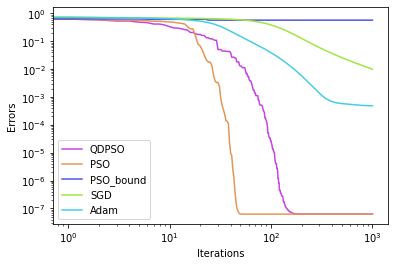

In [71]:
plt.plot(x_qdpso_best_10000, y_qdpso_best_10000, '#C843E6', linestyle = '-', label='QDPSO')
plt.plot(x_pso_best_10000, y_pso_best_10000, '#E69553', linestyle = '-', label='PSO')
plt.plot(x_pso_bound_best_10000, y_pso_bound_best_10000, '#4E53E6', linestyle = '-', label='PSO_bound')
plt.plot(sgd_loss_load_10000, '#A0E641', linestyle = '-', label='SGD')
plt.plot(adam_loss_load_10000, '#43CEE6', linestyle = '-', label='Adam')
#plt.title("The Best Loss of the Metaheuristic-based Optimizers")
plt.ylabel("Errors")
plt.xlabel("Iterations")
#plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

## 3 classes

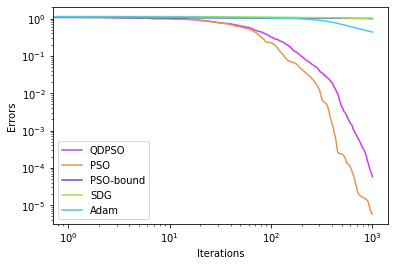

In [104]:
plt.plot(x_qdpso_best_500_3, y_qdpso_best_500_3, color='#C843E6', linestyle = '-', label='QDPSO')
plt.plot(x_pso_best_500_3, y_pso_best_500_3, color='#E69553', linestyle = '-', label='PSO')
plt.plot(x_pso_bound_best_500_3, y_pso_bound_best_500_3, color='#4E53E6', linestyle = '-', label='PSO-bound')
plt.plot(sgd_loss_load_500_3, color='#A0E641', linestyle = '-', label='SDG')
plt.plot(adam_loss_load_500_3, color='#43CEE6', linestyle = '-', label='Adam')

#plt.title("The Best Loss of the Metaheuristic-based Optimizers")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

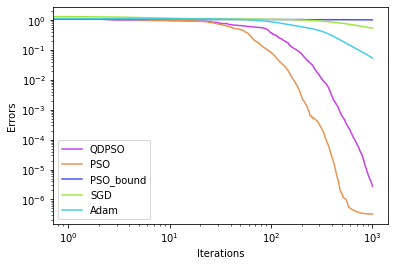

In [102]:
plt.plot(x_qdpso_best_2000_3, y_qdpso_best_2000_3, '#C843E6', linestyle = '-', label='QDPSO')
plt.plot(x_pso_best_2000_3, y_pso_best_2000_3, '#E69553', linestyle = '-', label='PSO')
plt.plot(x_pso_bound_best_2000_3, y_pso_bound_best_2000_3, '#4E53E6', linestyle = '-', label='PSO_bound')
plt.plot(sgd_loss_load_2000_3, '#A0E641', linestyle = '-', label='SGD')
plt.plot(adam_loss_load_2000_3, '#43CEE6', linestyle = '-', label='Adam')

#plt.title("The Best Loss of the Metaheuristic-based Optimizers")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

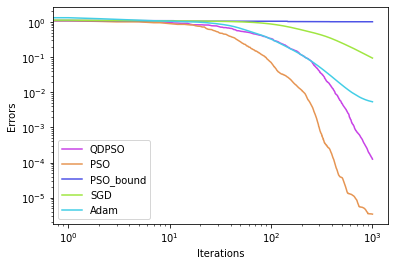

In [103]:
plt.plot(x_qdpso_best_10000_3, y_qdpso_best_10000_3, '#C843E6', linestyle = '-', label='QDPSO')
plt.plot(x_pso_best_10000_3, y_pso_best_10000_3, '#E69553', linestyle = '-', label='PSO')
plt.plot(x_pso_bound_best_10000_3, y_pso_bound_best_10000_3, '#4E53E6', linestyle = '-', label='PSO_bound')
plt.plot(sgd_loss_load_10000_3, '#A0E641', linestyle = '-', label='SGD')
plt.plot(adam_loss_load_10000_3, '#43CEE6', linestyle = '-', label='Adam')

#plt.title("The Best Loss of the Metaheuristic-based Optimizers")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

## 4 Classes

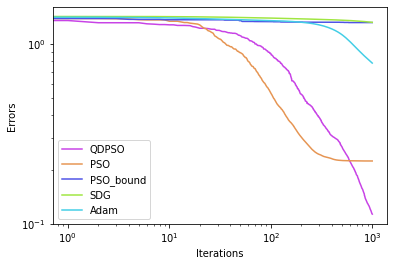

In [101]:
plt.plot(x_qdpso_best_500_4, y_qdpso_best_500_4, color='#C843E6', linestyle = '-', label='QDPSO')
plt.plot(x_pso_best_500_4, y_pso_best_500_4, color='#E69553', linestyle = '-', label='PSO')
plt.plot(x_pso_bound_best_500_4, y_pso_bound_best_500_4, color='#4E53E6', linestyle = '-', label='PSO_bound')
plt.plot(sgd_loss_load_500_4, color='#A0E641', linestyle = '-', label='SDG')
plt.plot(adam_loss_load_500_4, color='#43CEE6', linestyle = '-', label='Adam')

#plt.title("The Best Loss of the Metaheuristic-based Optimizers")
plt.ylabel("Errors")
plt.xlabel("Iterations")
#plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

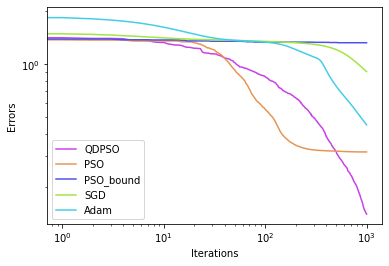

In [100]:
plt.plot(x_qdpso_best_2000_4, y_qdpso_best_2000_4, '#C843E6', linestyle = '-', label='QDPSO')
plt.plot(x_pso_best_2000_4, y_pso_best_2000_4, '#E69553', linestyle = '-', label='PSO')
plt.plot(x_pso_bound_best_2000_4, y_pso_bound_best_2000_4, '#4E53E6', linestyle = '-', label='PSO_bound')
plt.plot(sgd_loss_load_2000_4, '#A0E641', linestyle = '-', label='SGD')
plt.plot(adam_loss_load_2000_4, '#43CEE6', linestyle = '-', label='Adam')

#plt.title("The Best Loss of the Metaheuristic-based Optimizers")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
#plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.yscale('log')
plt.xscale('log')
plt.show()

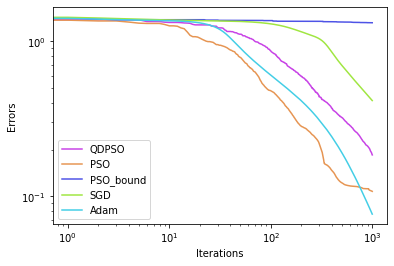

In [99]:
plt.plot(x_qdpso_best_10000_4, y_qdpso_best_10000_4, '#C843E6', linestyle = '-', label='QDPSO')
plt.plot(x_pso_best_10000_4, y_pso_best_10000_4, '#E69553', linestyle = '-', label='PSO')
plt.plot(x_pso_bound_best_10000_4, y_pso_bound_best_10000_4, '#4E53E6', linestyle = '-', label='PSO_bound')
plt.plot(sgd_loss_load_10000_4, '#A0E641', linestyle = '-', label='SGD')
plt.plot(adam_loss_load_10000_4, '#43CEE6', linestyle = '-', label='Adam')

#plt.title("The Best Loss of the Metaheuristic-based Optimizers")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
#plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.yscale('log')
plt.xscale('log')
plt.show()